In [1]:
import pandas as pd
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from util_prophet import *

In [2]:
df = pd.read_csv('hw5_data_co2.csv')
df['y'] = df['co2']
df.head()


,ds,co2,y
0,1958-03-15,315.700,315.700
1,1958-04-15,317.450,317.450
2,1958-05-15,317.510,317.510
3,1958-06-15,316.685,316.685
4,1958-07-15,315.860,315.860


In [3]:
train = df.iloc[:int(len(df)*0.8)]
test = df.iloc[int(len(df)*0.8):]

In [4]:
model = Prophet()
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
train

,ds,co2,y
0,1958-03-15,315.700,315.700
1,1958-04-15,317.450,317.450
2,1958-05-15,317.510,317.510
3,1958-06-15,316.685,316.685
4,1958-07-15,315.860,315.860
...,...,...,...
583,2006-10-15,379.060,379.060
584,2006-11-15,380.140,380.140
585,2006-12-15,381.660,381.660
586,2007-01-15,382.580,382.580


## Arguments for cross_validation
 - horizon: forecast horizon
 - initial: initial training period
 - period: spacing between cutoff dates

In [6]:
df_cv = cross_validation(model, initial='730 days', period='1825 days', horizon = '365 days')

INFO:fbprophet:Making 10 forecasts with cutoffs between 1961-02-26 00:00:00 and 2006-02-15 00:00:00


  0%|          | 0/10 [00:00<?, ?it/s]

In [7]:
df_cv.head(15)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1961-03-15,316.976720,316.669512,317.298964,318.54,1961-02-26
1,1961-04-15,318.091097,316.787238,319.558145,319.48,1961-02-26
2,1961-05-15,318.288040,315.756816,321.062696,320.58,1961-02-26
3,1961-06-15,317.346157,312.898589,321.826686,319.77,1961-02-26
4,1961-07-15,315.637509,309.171475,322.177156,318.57,1961-02-26
5,1961-08-15,313.390152,304.524548,322.116095,316.79,1961-02-26
6,1961-09-15,311.349017,299.938004,322.288606,314.99,1961-02-26
7,1961-10-15,311.725439,297.743151,325.068179,315.31,1961-02-26
8,1961-11-15,312.882048,296.112138,328.999864,316.10,1961-02-26
9,1961-12-15,313.812666,294.217253,332.767476,317.01,1961-02-26


## Specifying our own cutoffs

In [8]:
cutoffs = pd.to_datetime(['1975-02-15', '1985-02-15', '1995-02-15'])
df_cv2 = cross_validation(model, cutoffs=cutoffs, horizon='365 days')

  0%|          | 0/3 [00:00<?, ?it/s]

In [9]:
cutoffs

DatetimeIndex(['1975-02-15', '1985-02-15', '1995-02-15'], dtype='datetime64[ns]', freq=None)

In [10]:
train

,ds,co2,y
0,1958-03-15,315.700,315.700
1,1958-04-15,317.450,317.450
2,1958-05-15,317.510,317.510
3,1958-06-15,316.685,316.685
4,1958-07-15,315.860,315.860
...,...,...,...
583,2006-10-15,379.060,379.060
584,2006-11-15,380.140,380.140
585,2006-12-15,381.660,381.660
586,2007-01-15,382.580,382.580


In [11]:
df_cv2[10:15]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
10,1976-01-15,332.444366,331.851625,332.966295,331.75,1975-02-15
11,1976-02-15,333.104887,332.500771,333.654063,332.56,1975-02-15
12,1985-03-15,346.624748,346.250876,347.017107,347.42,1985-02-15
13,1985-04-15,347.845945,347.475443,348.245370,348.35,1985-02-15
14,1985-05-15,348.416119,348.034232,348.782485,348.93,1985-02-15


## Performance metrics

In [12]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,49 days,0.697655,0.835257,0.693255,0.002062,0.001738,0.333333
1,50 days,0.644365,0.802723,0.674921,0.001995,0.001738,0.333333
2,52 days,0.602899,0.776465,0.622223,0.001831,0.001436,0.416667
3,53 days,0.583569,0.763917,0.599147,0.001757,0.001109,0.500000
4,54 days,0.584849,0.764754,0.602020,0.001763,0.001109,0.500000


## Visualizing the performance

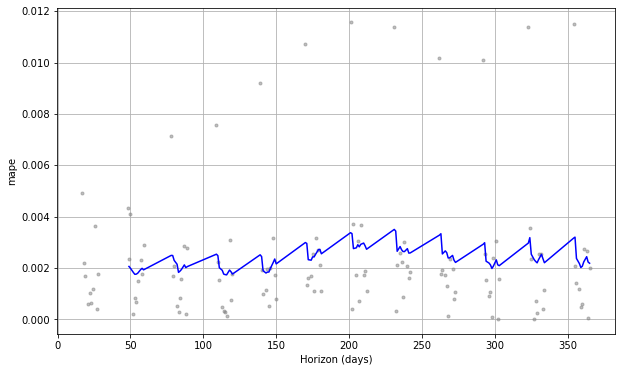

In [13]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

## Hyperparameter tuning

In [14]:
import itertools
import numpy as np
import pandas as pd

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x0000024B78437548>
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x0000024B781DE9C8>
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x0000024B776A86C8>
INFO:fbprophet:Disabling 

    changepoint_prior_scale  seasonality_prior_scale      rmse
0                     0.001                     0.01  0.485409
1                     0.001                     0.10  0.479369
2                     0.001                     1.00  0.488284
3                     0.001                    10.00  0.476243
4                     0.010                     0.01  0.605262
5                     0.010                     0.10  0.605991
6                     0.010                     1.00  0.610605
7                     0.010                    10.00  0.613293
8                     0.100                     0.01  0.659943
9                     0.100                     0.10  0.661852
10                    0.100                     1.00  0.661895
11                    0.100                    10.00  0.661165
12                    0.500                     0.01  0.674675
13                    0.500                     0.10  0.674643
14                    0.500                     1.00  0

### Parameters that can be tuned

 - **changepoint_prior_scale** - This is the most impactful parameter. It determines how much the trend changes at the changepoints, the flexibility of the trend. If this value is too small, the trend will be underfit and if it is too large, the trend will be overfit. Suggested tuning range [0.001, 0.5]<br>
 
 
 - **seasonality_prior_scale** - controls the flexibility of the seasonality. A large value allows the seasonality to fit large fluctuation, a small value shrinks the magnitude of the seasonality. Default is 10, which is no regularization. Suggested tuning range [0.01,10]<br>
 
 
 - **holidays_prior_scale** - controls the flexibility to fit holiday effects. Default is 10, which is no regularization. Suggested tuning range is [0.01,10]<br>
 
 
 - **seasonality mode** - additive vs multiplicative. You should be able to tell by looking at the plot, nonetheless it is tuneable.
 
### Parameters that you might tune

- **changepoint_range** - at what point in the trend do you stop changepoints. Default 0.80. In a fully automated setting, it would be beneficial to be less conservative. It may be difficult to generalize using cross validation, since you would only be varying the very end of the training set

In [15]:
modeltuned = Prophet(changepoint_prior_scale=0.001, seasonality_prior_scale=10.0)
modeltuned.fit(train)
future_data = modeltuned.make_future_dataframe(periods=len(test), freq='m')
forecast_data = modeltuned.predict(future_data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


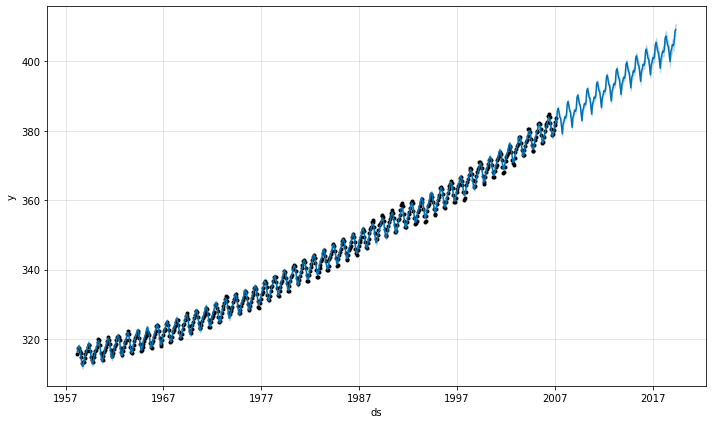

In [16]:
p = modeltuned.plot(forecast_data)
plt.show()

In [17]:
forecast_data[['ds','trend','yhat_lower','yhat_upper','yhat']].tail()

,ds,trend,yhat_lower,yhat_upper,yhat
730,2018-12-31,404.879241,403.322767,406.532858,404.834123
731,2019-01-31,405.039830,402.956684,406.194056,404.524133
732,2019-02-28,405.184879,403.719160,406.896498,405.199871
733,2019-03-31,405.345469,407.055143,410.201145,408.544748
734,2019-04-30,405.500878,407.542887,410.875401,409.172349


In [30]:
residuals = forecast_data['yhat'][:551] - df['y'][:551]
residuals=residuals[1:]
residuals

1      0.096591
2      0.561688
3      0.779965
4      0.124154
5     -0.944735
         ...   
546   -0.136079
547   -0.234280
548   -0.181524
549   -0.195275
550   -0.197404
Length: 550, dtype: float64

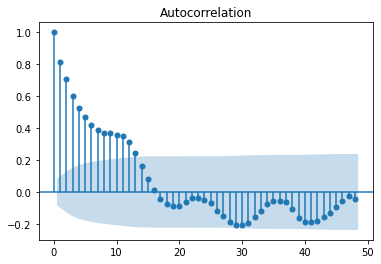

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(residuals, lags=48)
plt.show()

In [32]:
modeltuned2 = Prophet(changepoint_prior_scale=0.5, seasonality_prior_scale=10)
modeltuned2.fit(train)
future_data2 = modeltuned2.make_future_dataframe(periods=len(test), freq='m')
forecast_data2 = modeltuned2.predict(future_data2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


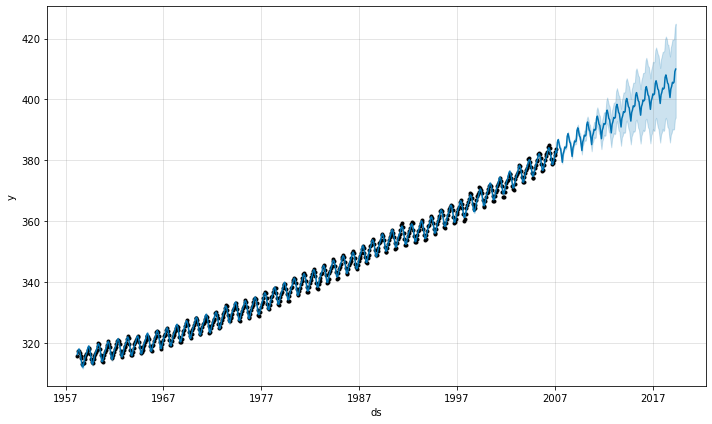

In [33]:
p = modeltuned2.plot(forecast_data2)
plt.show()

In [34]:
forecast_data2[['ds','trend','yhat_lower','yhat_upper','yhat']].tail()

,ds,trend,yhat_lower,yhat_upper,yhat
730,2018-12-31,405.553650,390.249413,419.639238,405.619816
731,2019-01-31,405.717688,390.057396,419.552554,405.339836
732,2019-02-28,405.865852,390.218582,419.855515,405.706321
733,2019-03-31,406.029889,393.441280,423.795192,409.149994
734,2019-04-30,406.188636,394.040829,424.881700,409.955713


In [35]:
residuals = forecast_data2['yhat'][:551] - df['y'][:551]
residuals=residuals[1:]
residuals

1      0.003582
2      0.483968
3      0.715184
4      0.071976
5     -0.984703
         ...   
546   -0.093994
547   -0.187810
548   -0.135335
549   -0.144266
550   -0.135764
Length: 550, dtype: float64

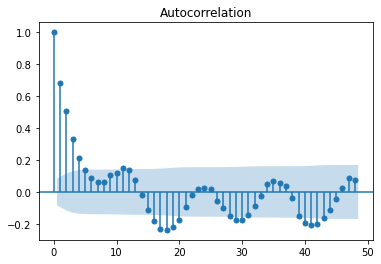

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(residuals, lags=48)
plt.show()